<a href="https://colab.research.google.com/github/iynnn/Data-Science/blob/main/Gamma%20Fest%202023/Percobaan_Ke_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

karena males ngelanjutin di yang pertama, soalnya ya dah berantakan

karena males ngelanjutin di yang pertama, soalnya ya dah berantakan

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)


Mounted at /content/drive


In [ ]:
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
path =  "/content/drive/MyDrive/[02] Lomba/[Current] GAMMAFEST IPB 2023 /Penyisihan"
train = pd.read_csv(path + "/train.csv")
test = pd.read_csv(path + "/test.csv")

In [ ]:
 train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35973 entries, 0 to 35972
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      35973 non-null  int64  
 1   DC024   35973 non-null  int64  
 2   DC025   35973 non-null  int64  
 3   DC205   35962 non-null  float64
 4   DC206   35952 non-null  float64
 5   DC207   35929 non-null  float64
 6   DC208   35960 non-null  float64
 7   DC209   35955 non-null  float64
 8   DC210   35932 non-null  float64
 9   DC211   35949 non-null  float64
 10  DC212   35949 non-null  float64
 11  DC213   35896 non-null  float64
 12  DC214   35964 non-null  float64
 13  DC215   35959 non-null  float64
 14  DC216   35934 non-null  float64
 15  DC217   35973 non-null  int64  
 16  DC219   35973 non-null  int64  
 17  DC220   35969 non-null  float64
 18  DC226   35967 non-null  float64
 19  DC230a  35962 non-null  float64
 20  DC230b  32964 non-null  float64
 21  DC232   32949 non-null  float64
 22

In [ ]:
missing_prop = train.isna().mean(axis = 0)
missing_prop

id        0.000000
DC024     0.000000
DC025     0.000000
DC205     0.000306
DC206     0.000584
DC207     0.001223
DC208     0.000361
DC209     0.000500
DC210     0.001140
DC211     0.000667
DC212     0.000667
DC213     0.002140
DC214     0.000250
DC215     0.000389
DC216     0.001084
DC217     0.000000
DC219     0.000000
DC220     0.000111
DC226     0.000167
DC230a    0.000306
DC230b    0.083646
DC232     0.084063
DC232b    0.084063
DC235     0.290384
DC237     0.000584
DC237a    0.001029
DC237b    0.001029
DC237c    0.001029
DC237d    0.001029
DC237e    0.001029
DC237f    0.001029
DC241     0.017013
DC242     0.149390
DC244     0.000111
DC246     0.000250
DC252     0.000389
DC270a    0.000000
DC109     0.000306
DC142a    0.001446
DC201     0.000083
dtype: float64

In [ ]:
over_threshold = missing_prop[missing_prop >= 0.1]
over_threshold


DC235    0.290384
DC242    0.149390
dtype: float64

In [ ]:
train.drop(over_threshold.index,
           axis = 1,
           inplace = True)

test.drop(over_threshold.index,
           axis = 1,
           inplace = True)

In [ ]:
X  = train.drop(columns = ["id", "DC201"], axis = 1)
y = train.DC201

In [ ]:
X.isna().sum()

DC024        0
DC025        0
DC205       11
DC206       21
DC207       44
DC208       13
DC209       18
DC210       41
DC211       24
DC212       24
DC213       77
DC214        9
DC215       14
DC216       39
DC217        0
DC219        0
DC220        4
DC226        6
DC230a      11
DC230b    3009
DC232     3024
DC232b    3024
DC237       21
DC237a      37
DC237b      37
DC237c      37
DC237d      37
DC237e      37
DC237f      37
DC241      612
DC244        4
DC246        9
DC252       14
DC270a       0
DC109       11
DC142a      52
dtype: int64

\we would like to impute  the variable using mode, but we have to note the variation in the variable



<Axes: xlabel='DC205', ylabel='count'>

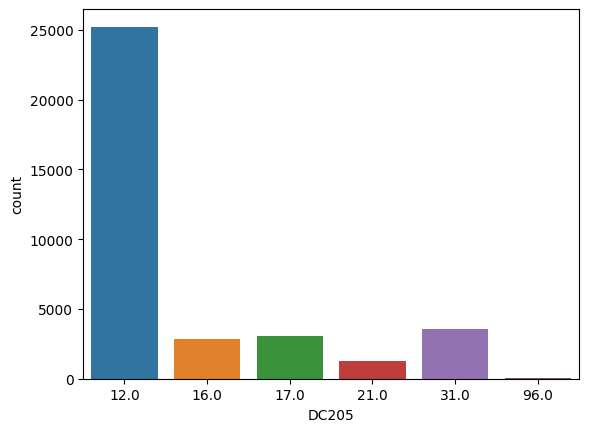

In [ ]:
sns.countplot(x = X['DC205'])

In [ ]:
X.value_counts('DC206')

DC206
1.0    34517
0.0     1435
dtype: int64

<Axes: xlabel='DC206', ylabel='count'>

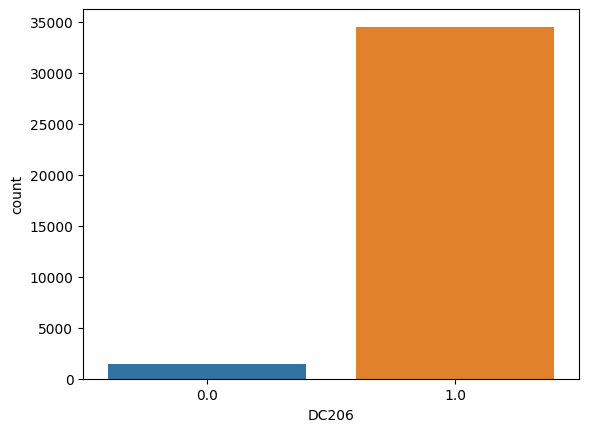

In [ ]:
sns.countplot(x = X['DC206'])

nanti bisa gini, itu yang belasan doang yang NaN bisa di drop aja, tapi yang 3000 an bisa dimodelin untuk dapet nilainya, jangan dimasukin sebagai modus, keknya itu crude banget

# Imputasi
kita bakal ngeimputasi di bagian yang 3000 an variabel itu aja, yang kecil kecil keknya bakalan gausah

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train.drop(columns = ["id", "DC201"], axis = 1))
X_scale = pd.DataFrame(scaler.transform(X))
X_scale

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,1.0,0.047619,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.50,0.00,0.011765,0.060120
1,0.0,1.0,0.226190,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.000,0.0,0.0,0.0,1.0,1.0,0.25,0.25,0.235294,0.070140
2,0.0,1.0,0.000000,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.000,0.0,0.0,0.0,1.0,1.0,0.00,0.75,0.000000,0.075150
3,0.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000,0.0,0.0,0.2,1.0,0.0,0.25,0.00,0.000000,0.085170
4,0.0,1.0,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.125,0.0,0.0,0.0,0.0,1.0,0.00,0.25,0.000000,0.065130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35968,1.0,0.0,0.059524,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.4,0.0,0.0,0.00,0.00,0.117647,0.009018
35969,1.0,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.25,0.000000,0.012024
35970,1.0,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.000,0.0,0.0,0.0,0.0,1.0,0.25,0.00,0.000000,0.048096
35971,1.0,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.00,0.25,0.000000,0.039078


In [ ]:
X_scale.columns = list(train.drop(columns = ["id", "DC201"], axis = 1))
X_scale["id"] = train["id"]
X_scale["DC201"] = train["DC201"]
X_scale

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237f,DC241,DC244,DC246,DC252,DC270a,DC109,DC142a,id,DC201
0,0.0,1.0,0.047619,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.50,0.00,0.011765,0.060120,1,Layak Minum
1,0.0,1.0,0.226190,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.25,0.25,0.235294,0.070140,2,Layak Minum
2,0.0,1.0,0.000000,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.00,0.75,0.000000,0.075150,3,Layak Minum
3,0.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.2,1.0,0.0,0.25,0.00,0.000000,0.085170,6,Layak Minum
4,0.0,1.0,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.00,0.25,0.000000,0.065130,7,Layak Minum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35968,1.0,0.0,0.059524,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.4,0.0,0.0,0.00,0.00,0.117647,0.009018,47958,Layak Minum
35969,1.0,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.25,0.000000,0.012024,47959,Layak Minum
35970,1.0,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.25,0.00,0.000000,0.048096,47961,Layak Minum
35971,1.0,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.25,0.000000,0.039078,47962,Layak Minum


In [ ]:
# Mapping Data
X_scale['DC201'] = X_scale['DC201'].map({'Layak Minum' : 1, 'Tidak Layak Minum' : 0})


In [ ]:
X_scale["DC201"].value_counts()

1.0    32398
0.0     3572
Name: DC201, dtype: int64

In [ ]:
X_scale_1 = X_scale.dropna()
X_scale_1

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237f,DC241,DC244,DC246,DC252,DC270a,DC109,DC142a,id,DC201
0,0.0,1.0,0.047619,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.50,0.00,0.011765,0.060120,1,1.0
1,0.0,1.0,0.226190,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.25,0.25,0.235294,0.070140,2,1.0
2,0.0,1.0,0.000000,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.00,0.75,0.000000,0.075150,3,1.0
3,0.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.2,1.0,0.0,0.25,0.00,0.000000,0.085170,6,1.0
4,0.0,1.0,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.00,0.25,0.000000,0.065130,7,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35966,1.0,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.00,0.75,0.000000,0.112224,47956,1.0
35969,1.0,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.25,0.000000,0.012024,47959,1.0
35970,1.0,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.25,0.00,0.000000,0.048096,47961,1.0
35971,1.0,0.0,0.000000,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.25,0.000000,0.039078,47962,1.0


In [ ]:
X_scale_fix = X_scale_1.drop(columns = ["DC201"], axis = 1)
Y = X_scale_1.DC201

In [ ]:
from xgboost import XGBClassifier
# read data
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scale_fix,Y, test_size = 0.2, random_state = 42)
print('Jumlah data Training : ', len(X_train), " | Jumlah data konfirm  : ", len(X_test))

Jumlah data Training :  25620  | Jumlah data konfirm  :  6405


In [ ]:
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = pd.DataFrame(bst.predict(X_test))


In [ ]:

model = XGBClassifier(silent=False,
                      scale_pos_weight=1,
                      learning_rate=0.01,
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic',
                      n_estimators=1000,
                      reg_alpha = 0.3,
                      max_depth=4,
                      gamma=10)

In [ ]:
model_xgb = model.fit(X_train, y_train)

[17:26:03] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [ ]:
model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=10, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xgb_pred = pd.DataFrame(model_xgb.predict(X_test))
xgb_pred


,0
0,1
1,1
2,1
3,1
4,1
...,...
6400,1
6401,1
6402,1
6403,1


In [ ]:
xgb_pred.value_counts()

1    6280
0     125
dtype: int64

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
scores = cross_validate(model_xgb, X_scale_1, Y, cv=5,
scoring=('accuracy', 'f1'), return_train_score=True)
predictions = cross_val_predict(model_xgb, X_scale_1, Y,
cv=5)

skor = pd.DataFrame(scores)
skor

[17:26:22] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[17:26:37] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[17:26:52] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[17:27:06] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[17:27:20] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[17:27:36] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[17:27:51] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[17:28:06] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[17:28:20] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[17:28:34] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



,fit_time,score_time,test_accuracy,train_accuracy,test_f1,train_f1
0,14.964269,0.034239,1.0,1.0,1.0,1.0
1,14.240392,0.035769,1.0,1.0,1.0,1.0
2,14.027829,0.039713,1.0,1.0,1.0,1.0
3,13.998753,0.039140,1.0,1.0,1.0,1.0
4,16.132711,0.038329,1.0,1.0,1.0,1.0


In [ ]:
scaler = MinMaxScaler()
X_test_scaled = pd.DataFrame(scaler.fit_transform(test.drop("id", axis = 1)))
X_test_scaled.columns = list(test.drop(columns = ["id"], axis = 1))
X_test_scaled["id"] = test["id"]
X_test_scaled

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237e,DC237f,DC241,DC244,DC246,DC252,DC270a,DC109,DC142a,id
0,0.289157,1.0,0.059524,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.000,0.0,1.0,1.0,0.25,0.50,0.117647,0.052104,26718
1,0.289157,0.0,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.25,0.25,0.000000,0.018036,26802
2,0.759036,1.0,0.000000,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.000,0.0,0.0,1.0,1.00,1.00,0.000000,0.078156,41302
3,0.734940,0.0,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.000,0.0,1.0,0.0,0.00,0.00,0.000000,0.020040,38698
4,0.783133,1.0,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.000,0.0,1.0,1.0,0.25,0.50,0.000000,0.125251,44257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,0.650602,1.0,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.000,0.0,0.0,0.0,0.00,0.75,0.000000,0.070140,36943
11986,0.602410,1.0,0.000000,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.125,0.0,1.0,0.0,0.00,0.75,0.000000,0.120240,33415
11987,0.759036,0.0,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.25,0.25,0.000000,0.072144,41998
11988,0.759036,1.0,0.226190,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.000,0.0,0.0,1.0,0.25,0.00,0.470588,0.009018,41567


In [ ]:
xgb_prediksi = pd.DataFrame(model_xgb.predict(X_test_scaled))
xgb_prediksi


,0
0,1
1,1
2,1
3,1
4,1
...,...
11985,1
11986,1
11987,1
11988,1


In [ ]:
xgb_prediksi.value_counts()

1    11612
0      378
dtype: int64

In [ ]:
final_xgb = xgb_prediksi
final_xgb["id"] = X_test_scaled["id"]
final_xgb



,0,id
0,1,26718
1,1,26802
2,1,41302
3,1,38698
4,1,44257
...,...,...
11985,1,36943
11986,1,33415
11987,1,41998
11988,1,41567


In [ ]:
list(final_xgb)

[0, 'id']

In [ ]:
final_xgb_bgt = X_test_scaled
prediksi_xgb = pd.DataFrame(xgb_prediksi)
prediksi_xgb['DC201'] = prediksi_xgb.iloc[:, 0]
prediksi_xgb_1 = prediksi_xgb.drop(1, axis  = 0)
# prediksi_xgb_1["DC201"].value_counts()

final_xgb_bgt['DC201'] = prediksi_xgb_1["DC201"].map({ 1 : 'Layak Minum',  0 : 'Tidak Layak Minum'})
final_xgb_bgt["DC201"].value_counts()

Layak Minum          11611
Tidak Layak Minum      378
Name: DC201, dtype: int64

In [ ]:
11611 + 378

11989

In [ ]:
final_xgb_bgt["DC201"].isna().sum()
## TAU DAH INI KOK ADA NA NYA SATUUUUUUUUUUU

1

In [ ]:
prediksi_xgb

,0,id,DC201
0,1,26718,1
1,1,26802,1
2,1,41302,1
3,1,38698,1
4,1,44257,1
...,...,...,...
11985,1,36943,1
11986,1,33415,1
11987,1,41998,1
11988,1,41567,1


In [ ]:
final_xgb_bgt

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237f,DC241,DC244,DC246,DC252,DC270a,DC109,DC142a,id,DC201
0,0.289157,1.0,0.059524,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.000,0.0,1.0,1.0,0.25,0.50,0.117647,0.052104,26718,Layak Minum
1,0.289157,0.0,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.000,0.0,0.0,0.0,0.25,0.25,0.000000,0.018036,26802,NaN
2,0.759036,1.0,0.000000,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.000,0.0,0.0,1.0,1.00,1.00,0.000000,0.078156,41302,Layak Minum
3,0.734940,0.0,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.000,0.0,1.0,0.0,0.00,0.00,0.000000,0.020040,38698,Layak Minum
4,0.783133,1.0,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.000,0.0,1.0,1.0,0.25,0.50,0.000000,0.125251,44257,Layak Minum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,0.650602,1.0,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.000,0.0,0.0,0.0,0.00,0.75,0.000000,0.070140,36943,Layak Minum
11986,0.602410,1.0,0.000000,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.125,0.0,1.0,0.0,0.00,0.75,0.000000,0.120240,33415,Layak Minum
11987,0.759036,0.0,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.000,0.0,0.0,0.0,0.25,0.25,0.000000,0.072144,41998,Layak Minum
11988,0.759036,1.0,0.226190,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000,0.0,0.0,1.0,0.25,0.00,0.470588,0.009018,41567,Layak Minum


In [ ]:
final_xgb_bgt_oke = final_xgb_bgt[["id", "DC201"]]

In [ ]:
final_xgb_bgt_oke.iloc[1,1] = "Layak Minum"

In [ ]:
final_xgb_bgt_oke

,id,DC201
0,26718,Layak Minum
1,26802,Layak Minum
2,41302,Layak Minum
3,38698,Layak Minum
4,44257,Layak Minum
...,...,...
11985,36943,Layak Minum
11986,33415,Layak Minum
11987,41998,Layak Minum
11988,41567,Layak Minum


final_1.to_csv(path + '/hasil.csv', index = False)

In [ ]:
final_xgb_bgt_oke.to_csv(path + '/xgb coba 1.csv', index = False)